In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Bank_churn_modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
cat=["Geography","Gender","HasCrCard","IsActiveMember","Exited"]
con=['CreditScore',"Tenure","Balance",'NumOfProducts',"EstimatedSalary","Age"]

In [9]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [10]:
print(df.shape)
df.head()

(10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
#univariate analysis
#bivariate analysis
#multivariate analysis


In [13]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

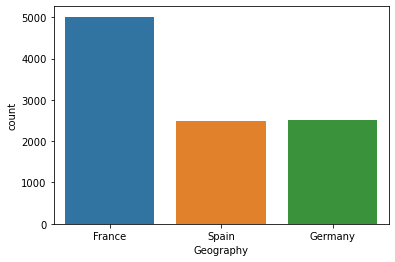

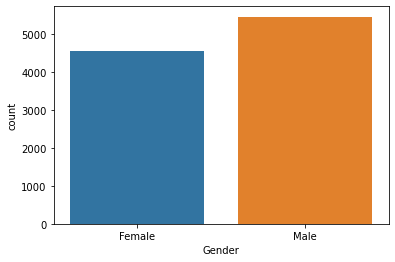

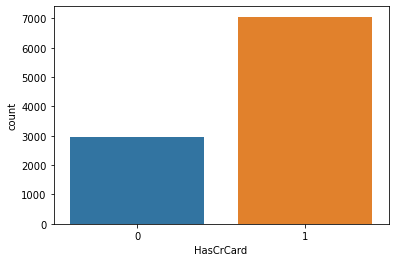

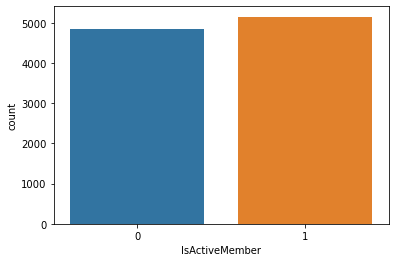

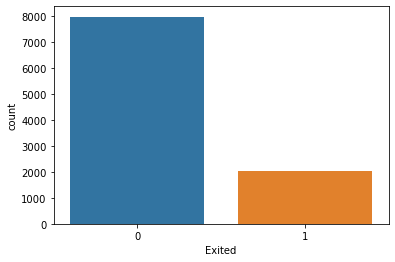

In [15]:
for i in cat:
    sns.countplot(x=i,data=df)
    plt.show()

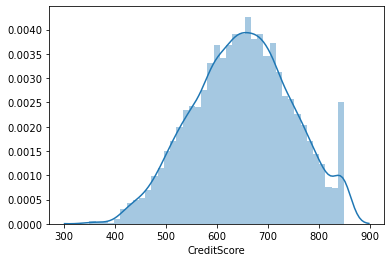

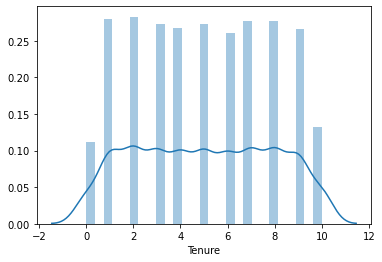

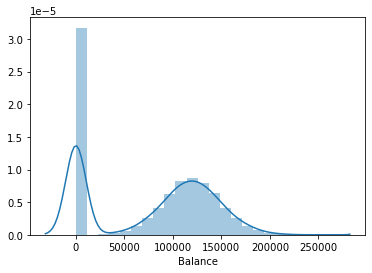

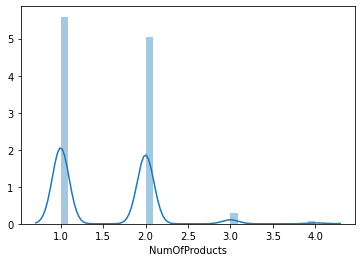

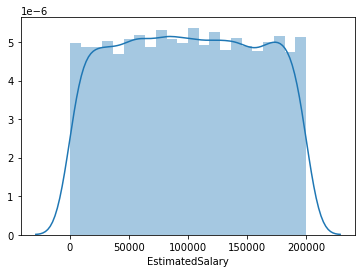

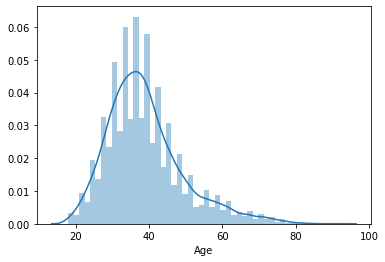

In [16]:
for i in con:
    sns.distplot(df[i])
    plt.show()

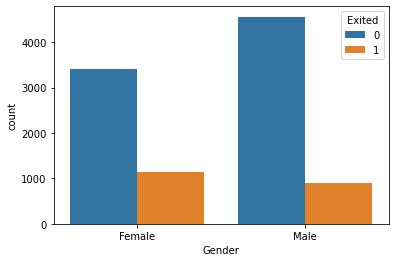

In [17]:
#bivariate analysis
sns.countplot(x="Gender",hue="Exited",data=df)
plt.show()

In [18]:
out=pd.crosstab(df["Gender"],df["Exited"],margins=True)
out

Exited,0,1,All
Gender,,,
Female,3404,1139,4543
Male,4559,898,5457
All,7963,2037,10000


In [29]:
out[1]

Gender
Female    1139
Male       898
All       2037
Name: 1, dtype: int64

In [19]:
out[1]/out["All"]

Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64

In [21]:
df[["Exited"]]

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


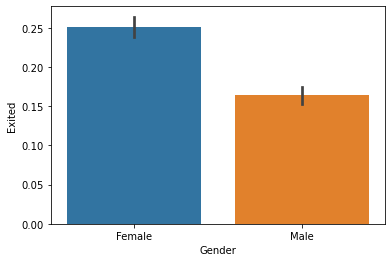

In [22]:
sns.barplot(x="Gender",y="Exited",data=df)

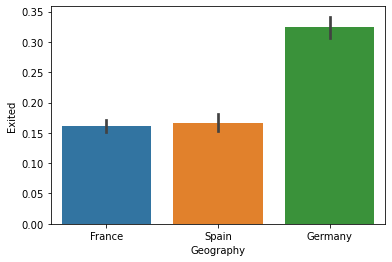

In [23]:
sns.barplot(x="Geography",y="Exited",data=df)
plt.show()

In [24]:
cat

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

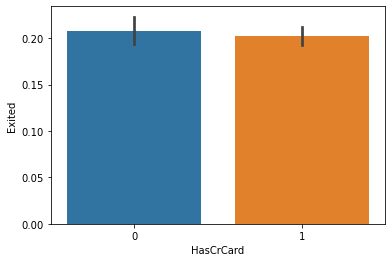

In [25]:
sns.barplot(x="HasCrCard",y="Exited",data=df)
plt.show()

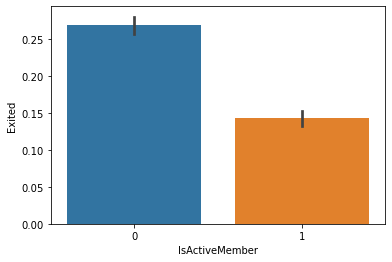

In [26]:
sns.barplot(x='IsActiveMember',y="Exited",data=df)
plt.show()

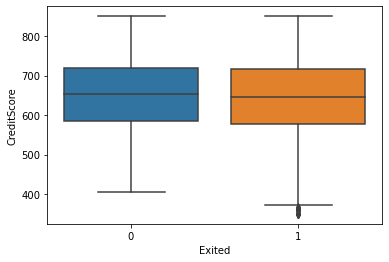

In [27]:
sns.boxplot(x="Exited",y="CreditScore",data=df)
plt.show()

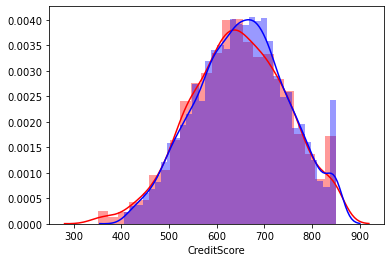

In [28]:
sns.distplot(df["CreditScore"][df["Exited"]==1],color='r')
sns.distplot(df["CreditScore"][df["Exited"]==0],color='b')
plt.show()

# Model Building(Decision Tree and Random Forest)

In [30]:
x=['CreditScore', 'Geography','Gender', 'Age','Balance', 'NumOfProducts', 'IsActiveMember']
y=['Exited']

In [31]:
x=df[x]
y=df[y]

In [32]:
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1


In [33]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
l1=LabelEncoder()
x["Gender"]=l1.fit_transform(x["Gender"])

<ipython-input-33-359c14245691>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"]=l1.fit_transform(x["Gender"])


In [35]:
encoder=ColumnTransformer([("sc",StandardScaler(),[0,3,4,5]),("on",OneHotEncoder(),[1])],remainder='passthrough')

In [36]:
encoder.fit(x)
x1=encoder.transform(x)

In [37]:
x2=pd.DataFrame(x1)
x2.head()

,0,1,2,3,4,5,6,7,8
0,-0.326221,0.293517,-1.225848,-0.911583,1.0,0.0,0.0,0.0,1.0
1,-0.440036,0.198164,0.117350,-0.911583,0.0,0.0,1.0,0.0,1.0
2,-1.536794,0.293517,1.333053,2.527057,1.0,0.0,0.0,0.0,0.0
3,0.501521,0.007457,-1.225848,0.807737,1.0,0.0,0.0,0.0,0.0
4,2.063884,0.388871,0.785728,-0.911583,0.0,0.0,1.0,0.0,1.0


In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x2,y,test_size=0.2)

In [39]:
from sklearn.tree import DecisionTreeClassifier
algo=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [40]:
algo.fit(xtrain,ytrain)
ypred=algo.predict(xtest)

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.846


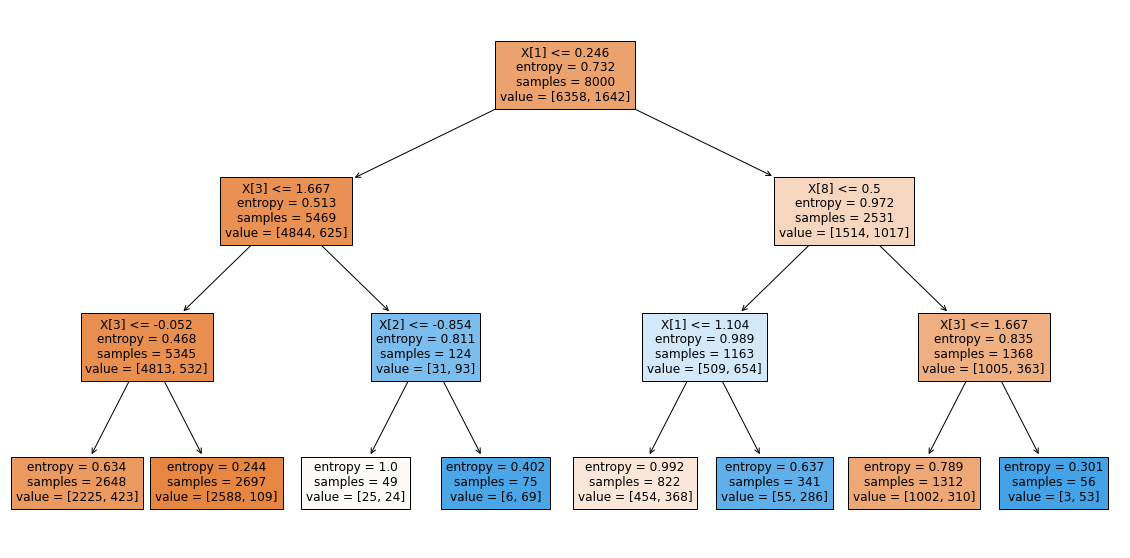

In [42]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(algo,filled=True)
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
algo1=RandomForestClassifier(n_estimators=20,criterion='entropy')
algo1.fit(xtrain,ytrain)
ypred=algo1.predict(xtest)

<ipython-input-44-9bb04aee445e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  algo1.fit(xtrain,ytrain)


In [45]:
accuracy_score(ytest,ypred)

0.8565